# Feature scaling

* Feature Scaling is a technique to standardize the independent features present in the data in a fixed range.
* It is performed during the data pre-processing to handle highly varying magnitudes or values or units.
* If feature scaling is not done, then a machine learning algorithm tends to weigh greater values,higher and consider smaller values as the lower values, regardless of the unit of the values.

# normalization

* Normalization is a scaling technique in Machine Learning applied during data preparation to change the values of numeric columns in the dataset to use a common scale.
* Min-Max Scaling
* Mean Scaling
* Absolute Maximum Scaling

# Min-Max Scaling

* First, we are supposed to find the minimum and the maximum value of the column.
* Then we will subtract the minimum value from the entry and divide the result by the difference between the maximum and the minimum value.
* As we are using the maximum and the minimum value this method is also prone to outliers but the range in which the data will range after performing the above two steps is between 0 to 1.

  

In [ ]:
                      x(old) - x(min) 
         X(scaled) =  ---------------
                      x(max) - x(min)

# Mean Scaling

* This method is more or less the same as the previous method but here instead of the minimum value, we subtract each entry by the mean value of the whole data and then divide the results by the difference between the minimum and the maximum value.



In [ ]:
                       x(old) - x(MEAN)
         X(scaled) =   ----------------
                        x(max) - x(min)

# Absolute Maximum Scaling

* We should first select the maximum absolute value out of all the entries of a particular measure.
* Then after this, we divide each entry of the column by this maximum value.
* After performing the above-mentioned two steps we will observe that each entry of the column lies in the range of -1 to 1. * But this method is not used that often the reason behind this is that it is too sensitive to the outliers. And while dealing with the real-world data presence of outliers is a very common thing. 



In [ ]:
                       x(old) - Max(|x|)
         X(scaled) =  -----------------
                           Max(|x|)

# Standardization

* This method of scaling is basically based on the central tendencies and variance of the data. 

* First, we should calculate the mean and standard deviation of the data we would like to normalize.
* Then we are supposed to subtract the mean value from each entry and then divide the result by the standard deviation.
* This helps us achieve a normal distribution(if it is already normal but skewed) of the data with a mean equal to zero and a standard deviation equal to 1.



In [ ]:
                      x(old) - MEAN
     X(scaled) =   ---------------------
                    standard deviation

# Robust Scaling

* In this method of scaling, we use two main statistical measures of the data.

--> Median

--> Inter-Quartile Range
* After calculating these two values we are supposed to subtract the median from each entry and then divide the result by the interquartile range.



In [ ]:
                    x(old) - Q2       x(old) - x(MEDIAN)
    X(scaled) =  -------------  =   ------------------
                    Q3 - Q1                IQR

# Diamond Data Set

In [22]:
import pandas as pd
import numpy as np
import sklearn

In [14]:
df=pd.read_csv(r'C:\Users\user\Downloads\diamonds.csv')
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [25]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [43]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [28]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [35]:
# splitting the data
x=df.drop(columns='price')
y=df['price']    

In [31]:
# splitting the data train and test using sklearn train-test-split

from sklearn.model_selection import train_test_split

In [32]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [36]:
# data can be separated by categorical and contineous

x_cont=x[['carat','depth','table','x','y','z']]
x_catg=x[['cut','color','clarity']]

In [39]:
x_cont_Train,x_cont_Test,x_catg_Train,x_catg_Test,y_Train,y_Test=train_test_split(x_cont, x_catg, y,
                                                                                  test_size=0.20,
                                                                                  random_state=23)

In [40]:
x_cont_Train.shape,x_cont_Test.shape,x_catg_Train.shape,x_catg_Test.shape,len(y_Train),len(y_Test)

((43152, 6), (10788, 6), (43152, 3), (10788, 3), 43152, 10788)

In [41]:
# copy the train data & test data

beforeNormTrain = x_cont_Train.copy()
beforeNormTest = x_cont_Test.copy()

# Min-Max Scaler

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
normScaler = MinMaxScaler()

In [46]:
# in the form of array

normScaler.fit_transform(x_cont_Train) 

array([[0.03326403, 0.52222222, 0.21153846, 0.42458101, 0.07809847,
        0.08899371],
       [0.04158004, 0.52222222, 0.23076923, 0.43854749, 0.08047538,
        0.0918239 ],
       [0.01039501, 0.55555556, 0.23076923, 0.37243948, 0.06842105,
        0.07955975],
       ...,
       [0.45738046, 0.48888889, 0.26923077, 0.80260708, 0.14872666,
        0.16540881],
       [0.16008316, 0.54722222, 0.30769231, 0.58472998, 0.10713073,
        0.12421384],
       [0.06237006, 0.55      , 0.25      , 0.47020484, 0.08624788,
        0.1       ]])

In [49]:
x_cont_norm_Train =pd.DataFrame(normScaler.fit_transform(x_cont_Train),
                               columns=x_cont_Train.columns,
                               index=x_cont_Train.index)
x_cont_norm_Train

,carat,depth,table,x,y,z
33662,0.033264,0.522222,0.211538,0.424581,0.078098,0.088994
42801,0.041580,0.522222,0.230769,0.438547,0.080475,0.091824
5723,0.010395,0.555556,0.230769,0.372439,0.068421,0.079560
43279,0.020790,0.536111,0.307692,0.399441,0.072156,0.083648
33311,0.031185,0.536111,0.230769,0.424581,0.076740,0.088994
...,...,...,...,...,...,...
9704,0.024948,0.452778,0.230769,0.419926,0.076910,0.084277
11190,0.203742,0.436111,0.326923,0.652700,0.117657,0.128616
26569,0.457380,0.488889,0.269231,0.802607,0.148727,0.165409
9256,0.160083,0.547222,0.307692,0.584730,0.107131,0.124214


In [50]:
x_cont_norm_Test =pd.DataFrame(normScaler.fit_transform(x_cont_Test),
                               columns=x_cont_Test.columns,
                               index=x_cont_Test.index)
x_cont_norm_Test

,carat,depth,table,x,y,z
21909,0.343832,0.444444,0.458333,0.741517,0.753521,0.725962
44847,0.086614,0.322751,0.375000,0.529940,0.541247,0.500000
25964,0.611549,0.465608,0.333333,0.880240,0.881288,0.860577
50691,0.086614,0.492063,0.291667,0.524950,0.526157,0.517628
52212,0.183727,0.560847,0.250000,0.611776,0.620724,0.620192
...,...,...,...,...,...,...
2498,0.165354,0.513228,0.416667,0.602794,0.602616,0.597756
6292,0.183727,0.566138,0.541667,0.607784,0.603622,0.610577
49448,0.081365,0.460317,0.333333,0.515968,0.519115,0.504808
21023,0.343832,0.518519,0.458333,0.728543,0.729376,0.724359


<Axes: ylabel='Count'>

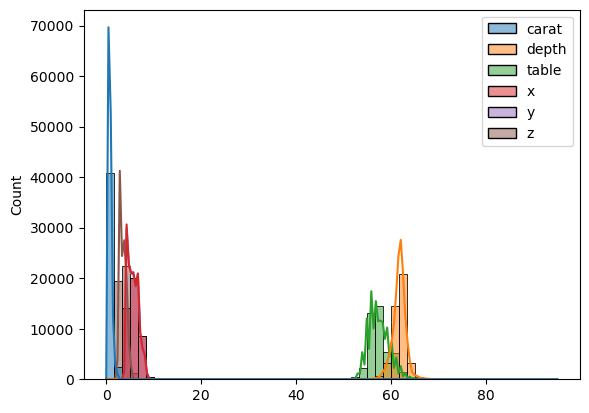

In [51]:
import seaborn as sns
sns.histplot(beforeNormTrain,kde=True)

<Axes: ylabel='Count'>

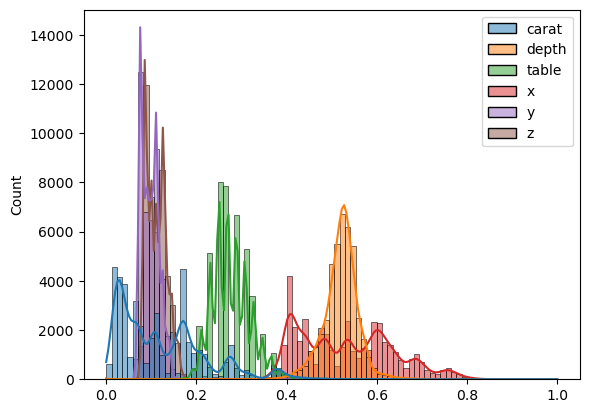

In [52]:
import seaborn as sns
sns.histplot(x_cont_norm_Train,kde=True)